In [1]:
import matplotlib.pyplot as plt

# http://www.ecircuitcenter.com/Circuits.htm
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from pathlib import Path
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import SubCircuitFactory
from PySpice.Spice.Parser import SpiceParser
from PySpice.Unit import *
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
from PySpice.Spice.Netlist import Circuit
import numpy as np
import random

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


2020-07-21 23:04:58,788 - PySpice.Doc.ExampleTools.find_libraries - INFO - SPICE library path is /home/m4zz31/anaconda3/lib/python3.7/libraries
2020-07-21 23:04:58,802 - PySpice.Spice.Parser.Element.__init__ - WARNING - F6 50 99 POLY(1) V6 450U 1
2020-07-21 23:04:58,803 - PySpice.Spice.Parser.Element.__init__ - WARNING - F6 50 99 POLY(1) V6 450U 1


In [2]:
circuit = Circuit('Transistor')

# COSAS VARIABLES

R_1 = [100]
R_2 = [20]
R_C = [10]
R_E = [2]
R_L = [1]
C_1 = [10]
C_2 = [10]
R1 = random.choice(R_1)
R2 = random.choice(R_2)
RC = random.choice(R_C)
RE = random.choice(R_E)
RL = random.choice(R_L)
C1 = random.choice(C_1)
C2 = random.choice(C_2)

circuit.R(1, 5, 2, R1@u_kΩ) #kOhm 
circuit.R(2, 2, 0, R2@u_kΩ)  #kOhm
circuit.R('C', 5, 4, RC@u_kΩ) #kOhm
circuit.R('E', 3, 0, RE@u_kΩ)  #kOhm
circuit.R('Load', 'out', 0, RL@u_MΩ)  #MOhm
circuit.C(1, 'in', 2, C1@u_uF)    #uF
circuit.C(2, 4, 'out', C2@u_uF)   #uF

# a transistor...
circuit.BJT(1, 4, 2, 3, model='bjt') # Q is mapped to BJT !
circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)


# Fuentes 
V_vector = [0.5]
w_vector = [1E3]
V = random.choice(V_vector)
w = random.choice(w_vector)

circuit.V('power', 5, circuit.gnd, 15@u_V)
circuit.V('var','in',circuit.gnd, f'DC 0 AC {V} SIN(0 {V}V {w})')
#source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, amplitude=.5@u_V, frequency=1@u_kHz)

2020-07-20 12:40:52,963 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword


VoltageSource Vvar

In [3]:
def run_me(T=25):
    simulator = circuit.simulator(temperature=T, nominal_temperature=T)
    #analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)
    analysis = simulator.transient(step_time = (1/w/25)@u_s,end_time=(4/w)@u_s)
    figure = plt.figure(1, (20, 10))
    axe = plt.subplot(111)
    plt.title('')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.grid()
    plot(analysis['in'], axis=axe)
    plot(analysis.out, axis=axe)
    plt.legend(('input', 'output'), loc=(.05,.1))
    plt.tight_layout()
    plt.show()
    return

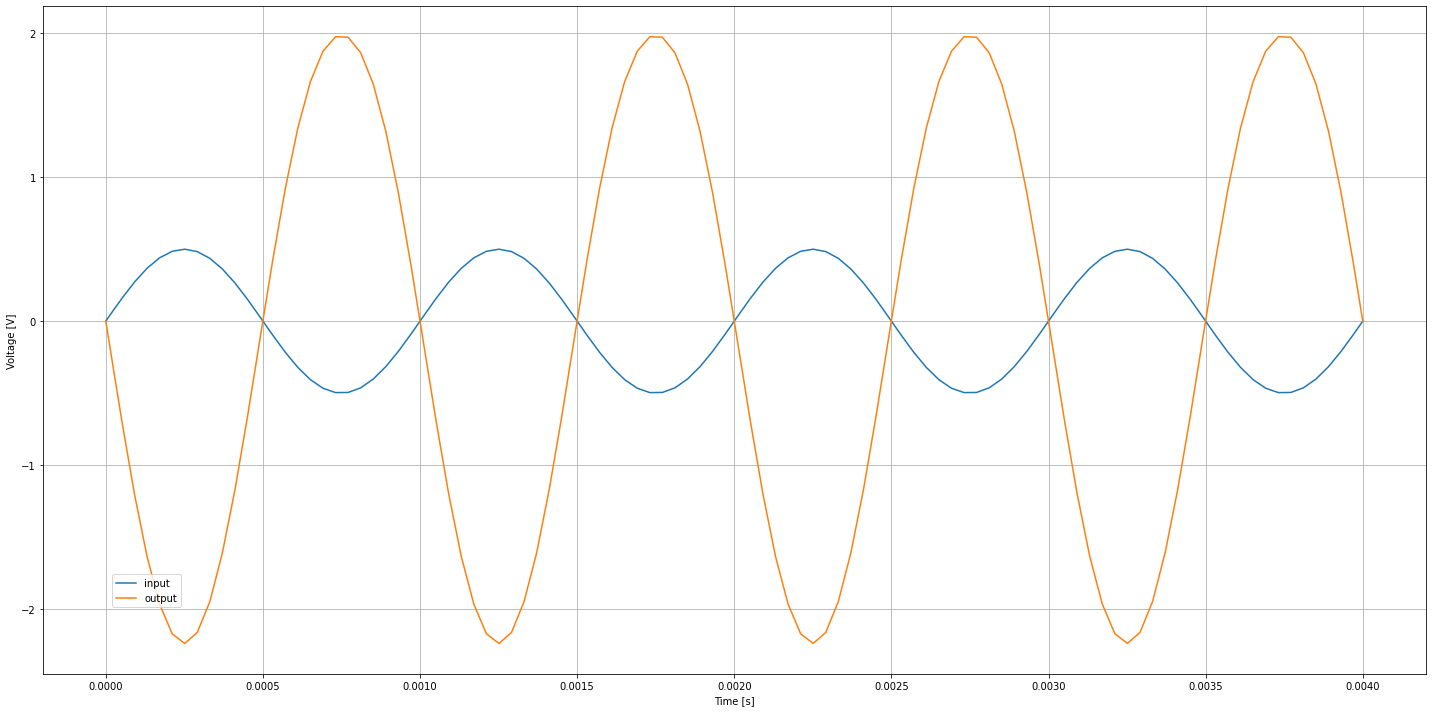

In [7]:
T = 500
run_me(T)

In [2]:
%%html
<img src="./schematic.png" width=550 style="text-align:center"/>

Text(0.5, 1.0, 'Factor de Amplificacion en funcion de la frecuencia')

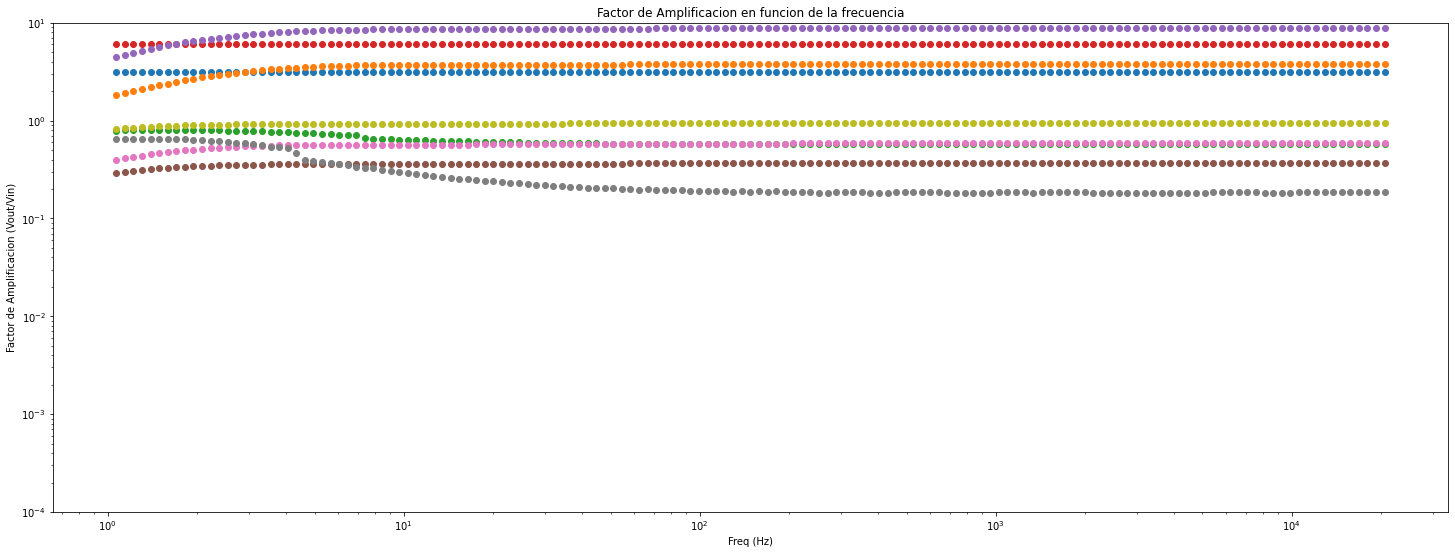

In [136]:
# y aca todo junto:
import random
import itertools
import matplotlib.pyplot as plt
from math import exp

#    ACOTADO
# R_1 = [100,85]
# R_2 = [20,22,18]
# R_C = [10,12,8]
# R_E = [2,2.2]
# R_L = [1,1.2]
# C_1 = [10]
# C_2 = [10]
# V_vector = [0.5,1.3,0.8,3,2.5]
# w_vector = [1E3]

R_1 = [100,50,20,200,150]
R_2 = [20,30,40,10]
R_C = [10,7,5,3,20,25,30]
RC = [5]
R_E = [2,3,5,8,4]
R_L = [1,2,3,0.5,0.2]
C_1 = [10,15,20,5]
C_2 = [10,15,30,40,5]
V_vector = [0.5,1.3,0.8,3,2.5]
w_vector = [1E3]


def doit(R1,R2,RC,RE,RL,C1,C2,V,w,optionalbool_1=False,optionalbool_2=True,optionalbool_3=False):
    circuit = Circuit('Will You Ever Name Me???')
    circuit.R(1, 5, 2, R1@u_kΩ) #kOhm 
    circuit.R(2, 2, 0, R2@u_kΩ)  #kOhm
    circuit.R('C', 5, 4, RC@u_kΩ) #kOhm
    circuit.R('E', 3, 0, RE@u_kΩ)  #kOhm
    circuit.R('Load', 'out', 0, RL@u_MΩ)  #MOhm
    circuit.C(1, 'inp', 2, C1@u_uF)    #uF
    circuit.C(2, 4, 'out', C2@u_uF)   #uF
    circuit.BJT(1, 4, 2, 3, model='bjt') # Q is mapped to BJT !
    circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)
    circuit.V('power', 5, circuit.gnd, 15@u_V)
    circuit.V('var','inp',circuit.gnd, f'DC 0 AC {V} SIN(0 {V}V {w})')
    if optionalbool_1:
        circuit.include(spice_library['D1N4148']) 
        circuit.X('diodus','D1N4148', 'out', circuit.gnd)
    T = 25
    simulator = circuit.simulator(temperature=T, nominal_temperature=T)
    analysis = simulator.transient(step_time = (1/w/200)@u_s,end_time=(3/w)@u_s)
    if optionalbool_2:
        figure = plt.figure(1, (20, 10))
        axe = plt.subplot(111)
        plt.title('')
        plt.xlabel('Time [s]')
        plt.ylabel('Voltage [V]')
        plt.grid()
        plot(analysis['inp'], axis=axe,label='in')
        plot(analysis.out, axis=axe,label='out')
        #plot(-analysis['out'],label='diodo')
        #plt.legend(('input', 'output'), loc=(.05,.1))
        plt.legend(loc=(.05,.1))
        plt.tight_layout()
        plt.show()
    if optionalbool_3:
        return [float(min(analysis['out']))]
    return

def iterplot():
    R1 = random.choice(R_1)
    R2 = random.choice(R_2)
    RC = random.choice(R_C)
    RE = random.choice(R_E)
    #RE = RC  # constraint!
    RL = random.choice(R_L)
    C1 = random.choice(C_1)
    C2 = random.choice(C_2)
    #C2 = C1  # constraint!
    V = random.choice(V_vector)
    #w = random.choice(w_vector)
    y = []
    w_iter = [exp(x/15) for x in range(1,150)]
    for w in w_iter:
        y += doit(R1,R2,RC,RE,RL,C1,C2,V,w,False,False,True)
    y = [-x/V for x in y]
    plt.figure(num=1,figsize=(25,9))
    #plt.plot(w_iter,y)
    plt.scatter(w_iter,y)
    return
for q in range(9):
    iterplot()
    
#plt.ylim(1,100)
plt.xscale('log')
plt.ylim(1E-4,10)
plt.yscale('log')
plt.ylabel('Factor de Amplificacion (Vout/Vin)')
plt.xlabel('Freq (Hz)')
plt.title('Factor de Amplificacion en funcion de la frecuencia')


In [3]:
%%html
<img src="./schematic_dioded.png" width=550 style="text-align:center"/>

Text(0.5, 1.0, 'Factor de Amplificacion en funcion de la frecuencia')

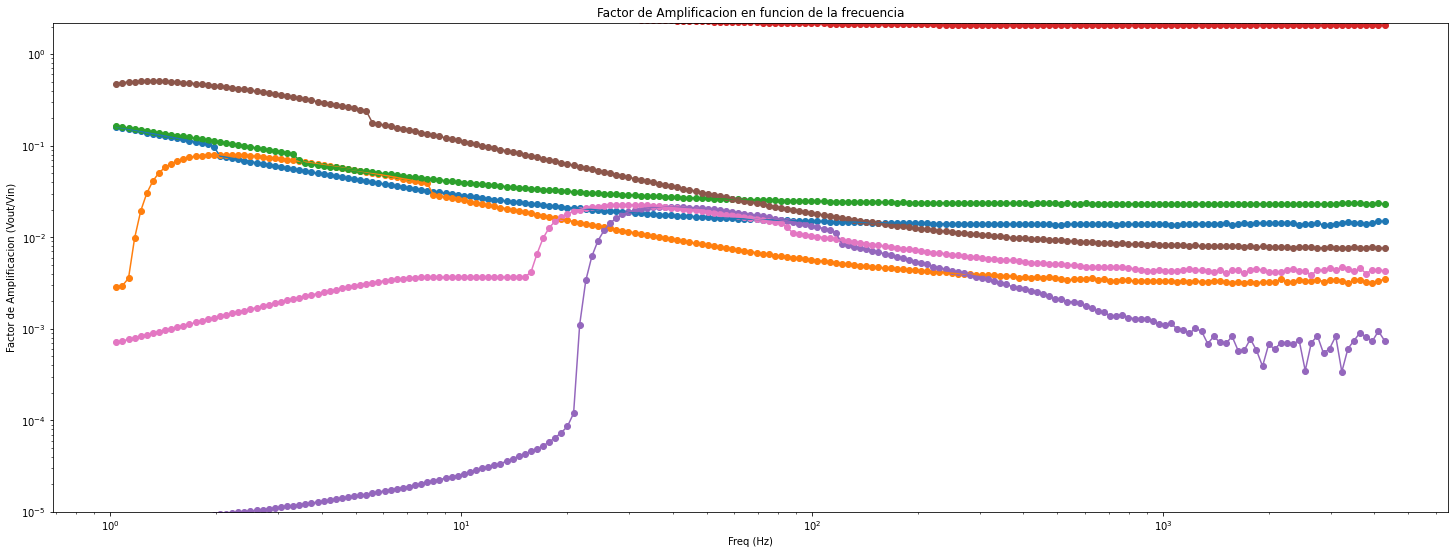

In [7]:
# y aca todo junto:
import random
import itertools
import matplotlib.pyplot as plt
from math import exp

#   ACOTADO
# R_1 = [100,85]
# R_2 = [20,22,18]
# R_C = [10,12,8]
# R_E = [2,2.2]
# R_L = [1,1.2]
# C_1 = [10]
# C_2 = [10]
# V_vector = [0.5,1.3,0.8,3,2.5]
# w_vector = [1E3]

# No acotado
R_1 = [100,50,20,200,150]
R_2 = [20,30,40,10]
R_C = [10,7,5,3,20,25,30]
R_E = [2,3,5,8,4]
R_L = [1,2,3,0.5,0.2]
C_1 = [10,15,20,5]
C_2 = [10,15,30,40,5]
V_vector = [0.5,1.3,0.8,3,2.5]
w_vector = [1E3]


# R_1 = [100]
# R_2 = [20]
# R_C = [10]
# R_E = [2]
# R_L = [1]
# C_1 = [10]
# C_2 = [10]
# V_vector = [0.5]
# w_vector = [1E3]


def iterplot():
    R1 = random.choice(R_1)
    R2 = random.choice(R_2)
    RC = random.choice(R_C)
    RE = random.choice(R_E)
    RL = random.choice(R_L)
    C1 = random.choice(C_1)
    C2 = random.choice(C_2)
    V = random.choice(V_vector)
    w = random.choice(w_vector)
    y = []
    w_iter = [exp(x/25) for x in range(1,210)]
    for w in w_iter:
        y += doit(R1,R2,RC,RE,RL,C1,C2,V,w,True,False,True)
    y = [-x/V for x in y]
    plt.figure(num=1,figsize=(25,9))
    plt.plot(w_iter,y)
    plt.scatter(w_iter,y)
    #doit(R1,R2,RC,RE,RL,C1,C2,V,w,True,True,False)
    return

def doit(R1,R2,RC,RE,RL,C1,C2,V,w,optionalbool_1=False,optionalbool_2=True,optionalbool_3=False):
    circuit = Circuit('Will You Ever Name Me???')
    circuit.R(1, 5, 2, R1@u_kΩ) #kOhm 
    circuit.R(2, 2, 0, R2@u_kΩ)  #kOhm
    circuit.R('C', 5, 4, RC@u_kΩ) #kOhm
    circuit.R('E', 3, 0, RE@u_kΩ)  #kOhm
    circuit.R('Load', 'out', 0, RL@u_MΩ)  #MOhm
    circuit.C(1, 'inp', 2, C1@u_uF)    #uF
    circuit.C(2, 4, 'out', C2@u_uF)   #uF
    circuit.BJT(1, 4, 2, 3, model='bjt') # Q is mapped to BJT !
    circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)
    circuit.V('power', 5, circuit.gnd, 15@u_V)
    circuit.V('var','inp',circuit.gnd, f'DC 0 AC {V} SIN(0 {V}V {w})')
    #circuit.R('extra',4,'out',100@u_kΩ)
    if optionalbool_1:
        circuit.include(spice_library['D1N4148']) 
        circuit.X('diodus','D1N4148', 3,2)
        #circuit.R('dLoad','temp',circuit.gnd,1@u_kΩ)
    T = 25
    simulator = circuit.simulator(temperature=T, nominal_temperature=T)
    analysis = simulator.transient(step_time = (1/w/250)@u_s,end_time=(4/w)@u_s)
    if optionalbool_2:
        figure = plt.figure(1, (20, 10))
        axe = plt.subplot(111)
        plt.title('')
        plt.xlabel('Time [s]')
        plt.ylabel('Voltage [V]')
        plt.grid()
        plot(analysis['inp'], axis=axe,label='in')
        plot(analysis.out, axis=axe,label='out')
        plot(analysis['4']-analysis['out'],label='diodo')
        #plot(analysis['temp'],label='current mA')
        #plt.legend(('input', 'output'), loc=(.05,.1))
        plt.legend(loc=(.05,.1))
        plt.tight_layout()
        plt.show()
    if optionalbool_3:
        return [float(min(analysis['out']))] # PEND!
    return
for q in range(7):
    iterplot()
    
plt.ylim(1,100)
plt.xscale('log')
plt.ylim(1E-5,2.2)
plt.yscale('log')
plt.ylabel('Factor de Amplificacion (Vout/Vin)')
plt.xlabel('Freq (Hz)')
plt.title('Factor de Amplificacion en funcion de la frecuencia')


In [2]:
import random
import matplotlib.pyplot as plt
from math import exp
def doit_f(R1,R2,RC,RE,RL,C1,C2,V,w,optionalboolean=False):
    if optionalboolean:
        #RC=3*RE
        for x in range(len((R1,R2,RC,RE,RL,C1,C2,V,w))):
            print('R1 R2 RC RE RL C1 C2 V W'.split()[x],
                         (R1,R2,RC,RE,RL,C1,C2,V,round(w,2))[x])
        #print('R1 R2 RC RE RL C1 C2 V W')
        #print(R1,R2,RC,RE,RL,C1,C2,V,w)
    circuit = Circuit('Will You Ever Name Me???')
    circuit.R(1, 5, 2, R1@u_kΩ) #kOhm 
    circuit.R(2, 2, 0, R2@u_kΩ)  #kOhm
    circuit.R('C', 5, 4, RC@u_kΩ) #kOhm
    circuit.R('E', 3, 0, RE@u_kΩ)  #kOhm
    circuit.R('Load', 'out', 0, RL@u_MΩ)  #MOhm
    circuit.C(1, 'inp', 2, C1@u_uF)    #uF
    circuit.C(2, 4, 'out', C2@u_uF)   #uF
    circuit.BJT(1, 4, 2, 3, model='bjt') # Q is mapped to BJT !
    circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)
    circuit.V('power', 5, circuit.gnd, 15@u_V)
    circuit.V('var','inp',circuit.gnd, f'DC 0 AC {V} SIN(0 {V}V {w})')
    circuit.include(spice_library['D1N4148']) 
    #circuit.X('diodus','D1N4148', 4,'out')
    circuit.X('diodus','D1N4148',3,2)
    T = 25
    simulator = circuit.simulator(temperature=T, nominal_temperature=T)
    analysis = simulator.transient(step_time = (1/w/100)@u_s,end_time=(4/w)@u_s)
    treshold = 4
    if optionalboolean:
        plot(analysis['out'],label='out')
        plot(analysis['inp'],label='in')
        plot(analysis['2']-analysis['3'],label='diodo')
        #plot(analysis['out'])
        plt.legend()
        plt.show()     # SCAR LOAD RESISTANCE!
    return [R1,R2,RC,RE,RL,C1,C2,V,w,
            #int(4<float(max(analysis['4']-analysis['out'])))] # PEND!
            int(treshold<float(max(analysis['3']-analysis['2'])))]

R_1 = np.random.uniform(low=1/1000, high=5000, size=2000) #[x/10 for x in range(1,1000)]
R_2 = np.random.uniform(low=1/1000, high=5000, size=2000) #[x/10 for x in range(1,1000)]
R_C = np.random.uniform(low=1/1000, high=5000, size=2000) #[x/20 for x in range(1,1000)]
R_E = np.random.uniform(low=1/1000, high=5000, size=2000) #[x/20 for x in range(1,1000)]
R_L = np.random.uniform(low=0.1, high=10, size=2000) #[x/20 for x in range(1,2000)] # ESTA EN MEGOHMS.. QUE SEA SOLO ID=1! 
C_1 = np.random.uniform(low=1/1000, high=1000, size=2000) #[x/50 for x in range(1,2000,10)]
C_2 = np.random.uniform(low=1/1000, high=1000, size=2000) #[x/50 for x in range(1,2000,10)]
V_vector = np.random.uniform(low=1/50, high=50, size=2000) #[x/20 for x in range(1,500)]
w_vector = np.random.uniform(low=1/100, high=1E6, size=2000) #[exp(x/15) for x in range(1,200)]


answ = []
veces = 25000
#fig, axy = plt.subplots(veces,1,figsize=(20,int(4*veces)))
counter = 0
errorlog = []
while counter <veces:
    try: 
        answ += [doit_f(random.choice(R_1),
     random.choice(R_2),
     random.choice(R_C),
     random.choice(R_E),
    random.choice(R_L),
         random.choice(C_1),
     random.choice(C_2),
    random.choice(V_vector),
    random.choice(w_vector),
        #,axy[counter],
                   )]
    except Exception as ins:
        errorlog.append(ins.args)
    counter += 1
import pandas as pd

data = pd.DataFrame(answ,columns=['R1','R2','RC','RE','RL','C1','C2','V','W','D'])

#fig.savefig('algo.png')
print(errorlog)
data.to_excel("more_sparse.xlsx")
if False:
    data.to_excel("FULL.xlsx")
    data[:1500].drop('D', axis=1).to_excel("TEST.xlsx",index=False)
    data[:1500].to_excel("TEST_cresults.xlsx",index=False)
    data[1500:].to_excel("TRAIN.xlsx",index=False)

2020-07-21 23:12:41,948 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.new_instance - INFO - New instance for id 0
2020-07-21 23:12:41,949 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._load_library - WARNING - Set locale LC_NUMERIC to C
2020-07-21 23:12:42,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:42,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:42,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:42,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:42,453 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:42,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subt

2020-07-21 23:12:43,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:43,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:43,576 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:43,596 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:43,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:43,630 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:43,655 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:43,682 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:44,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:44,661 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:44,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:44,685 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:44,698 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:44,710 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:44,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:44,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:45,568 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:45,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:45,599 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:45,620 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:45,633 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:45,650 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:45,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:45,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:46,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:46,377 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:46,395 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:46,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:46,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:46,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:46,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:46,479 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:47,262 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:47,287 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:47,305 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:47,325 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:47,339 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:47,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:47,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:47,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:48,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,124 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,238 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:48,943 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:48,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,013 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:49,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:49,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:50,819 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:50,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:50,846 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:50,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:50,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:50,883 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:50,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:50,914 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:51,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:51,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:51,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:51,587 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:51,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:51,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:51,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:51,652 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:52,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:52,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:52,279 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:52,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:52,306 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:52,323 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:52,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:52,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:53,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,138 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,152 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,178 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,190 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:53,964 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,980 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:53,991 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:54,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,823 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,836 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,857 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:54,912 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:55,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:55,510 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:55,523 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:55,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:55,550 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:55,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:55,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:55,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:56,181 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,232 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,248 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,274 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:56,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:56,940 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:57,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:57,580 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:57,593 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:57,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:57,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:57,631 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:57,645 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:57,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:58,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:58,371 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:58,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:58,396 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:58,409 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:58,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:58,436 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:58,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:12:59,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:59,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:59,309 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:59,322 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:59,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:59,347 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:59,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:12:59,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:00,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,059 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,179 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:00,887 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,904 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,920 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,934 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,947 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,960 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:00,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:01,724 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:01,752 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:01,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:01,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:01,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:01,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:01,863 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:01,887 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:02,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:02,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:02,754 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:02,766 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:02,780 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:02,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:02,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:02,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:03,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:03,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:03,921 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:03,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:03,959 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:03,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,047 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:04,791 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,833 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:04,905 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:05,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:05,648 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:05,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:05,677 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:05,691 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:05,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:05,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:05,735 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:06,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:06,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:06,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:06,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:06,410 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:06,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:06,439 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:06,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:07,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,109 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:07,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:07,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,002 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,028 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,059 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:08,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,703 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:08,757 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:09,394 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:09,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:09,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:09,446 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:09,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:09,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:09,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:09,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:10,183 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:10,196 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:10,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:10,221 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:10,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:10,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:10,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:10,287 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:11,008 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:11,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:11,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:12,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,772 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,796 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,818 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,839 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:12,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:13,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:13,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:13,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:13,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:13,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:13,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:13,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:13,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:14,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:14,285 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:14,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:14,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:14,332 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:14,345 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:14,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:14,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:15,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,073 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,084 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,113 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:15,791 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,883 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,918 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:15,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:16,609 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:16,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:16,634 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:16,647 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:16,660 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:16,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:16,686 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:16,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:17,541 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:17,557 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:17,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:17,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:17,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:17,626 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:17,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:17,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:18,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:18,254 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:18,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:18,293 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:18,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:18,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:18,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:18,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:18,984 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:18,997 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,010 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,064 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,078 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:19,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,833 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,857 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:19,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:20,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:20,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:20,542 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:20,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:20,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:20,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:20,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:20,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:21,276 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:21,290 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:21,302 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:21,314 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:21,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:21,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:21,380 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:21,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:22,159 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:22,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:22,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:22,214 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:22,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:22,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:22,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:22,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:23,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:23,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:23,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:23,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:23,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:23,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:23,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:23,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:24,089 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,155 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,169 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,189 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:24,905 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,919 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,960 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:24,989 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:25,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:25,934 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:25,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:25,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:25,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,016 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:26,745 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,818 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,834 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:26,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:27,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:27,522 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:27,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:27,569 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:27,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:27,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:27,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:27,626 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:28,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:28,259 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:28,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:28,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:28,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:28,313 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:28,325 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:28,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:29,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,295 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:29,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:29,992 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,016 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,042 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:30,667 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,716 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,743 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,771 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:30,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:31,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:31,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:31,471 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:31,485 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:31,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:31,513 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:31,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:31,539 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:32,314 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:32,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:32,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:32,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:32,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:32,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:32,432 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:32,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:33,306 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:33,329 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:33,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:33,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:33,395 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:33,418 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:33,439 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:33,461 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:34,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:34,157 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:34,178 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:34,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:34,222 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:34,244 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:34,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:34,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:35,043 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:35,852 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,880 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,947 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:35,992 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:36,644 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:36,657 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:36,669 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:36,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:36,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:36,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:36,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:36,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:37,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:37,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:37,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:37,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:37,525 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:37,540 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:37,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:37,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:38,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:38,178 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:38,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:38,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:38,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:38,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:38,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:38,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:38,968 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:38,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,012 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,113 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:39,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,806 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,833 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,846 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,861 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:39,880 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:40,525 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:40,539 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:40,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:40,568 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:40,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:40,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:40,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:40,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:41,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:41,333 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:41,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:41,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:41,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:41,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:41,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:41,434 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:42,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,168 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,183 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,254 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:42,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,960 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,977 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:42,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:43,725 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,771 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,843 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:43,883 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:44,535 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:44,550 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:44,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:44,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:44,603 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:44,623 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:44,637 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:44,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:45,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:45,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:45,406 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:45,419 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:45,437 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:45,457 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:45,489 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - doAnalyses: TRAN:  Timestep too small; time = 1.24426e-09, timestep = 1.47248e-20: trouble with bjt-instance q1
2020-07-21 2

2020-07-21 23:13:46,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:46,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:46,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:46,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:46,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:46,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:46,274 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:46,291 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:46,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,028 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,041 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,068 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:47,826 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,849 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,924 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:47,951 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:48,703 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:48,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:48,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:48,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:48,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:48,777 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:48,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:48,807 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:49,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:49,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:49,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:49,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:49,544 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:49,559 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:49,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:49,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:50,291 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:50,305 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:50,325 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:50,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:50,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:50,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:50,386 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:50,400 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:51,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:51,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,934 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:51,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:52,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:52,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:52,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:52,761 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:52,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:52,791 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:52,808 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:52,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:52,837 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:53,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:53,518 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:53,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:53,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:53,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:53,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:53,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:53,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:54,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:54,366 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:54,389 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:54,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:54,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:54,458 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:54,482 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:54,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:55,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,193 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,209 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,238 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,272 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:55,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,971 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:55,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,010 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:56,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,787 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,818 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,863 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:56,877 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:57,559 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:57,581 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:57,603 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:57,626 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:57,648 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:57,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:57,694 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:57,716 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:58,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:58,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:58,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:58,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:58,650 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:58,665 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:58,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:58,695 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:13:59,519 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:59,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:59,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:59,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:59,582 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:59,596 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:59,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:13:59,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:00,294 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:00,310 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:00,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:00,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:00,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:00,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:00,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:00,419 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:01,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:01,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:01,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:01,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:01,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:01,271 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:01,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:01,304 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:02,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,138 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:02,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,826 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:02,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:03,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:03,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:03,641 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:03,656 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:03,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:03,689 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:03,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:03,725 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:04,451 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:04,467 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:04,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:04,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:04,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:04,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:04,542 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:04,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:05,298 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:05,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:05,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:05,351 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:05,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:05,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:05,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:05,404 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:06,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:06,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:06,114 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:06,138 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:06,153 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:06,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:06,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:06,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:06,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,122 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:07,767 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,782 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,795 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,809 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,842 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,857 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:07,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:08,680 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:08,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:08,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:08,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:08,773 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:08,796 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:08,818 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:08,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:09,608 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:09,622 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:09,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:09,652 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:09,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:09,680 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:09,694 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:09,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:10,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:10,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:10,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:10,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:10,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:10,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:10,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:10,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:11,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:11,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:11,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:11,395 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:11,409 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:11,424 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:11,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:11,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:12,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,135 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,168 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,181 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,209 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:12,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,951 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:12,997 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:13,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,724 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,737 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,801 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:13,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:14,506 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:14,519 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:14,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:14,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:14,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:14,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:14,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:14,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:15,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:15,306 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:15,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:15,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:15,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:15,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:15,379 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:15,394 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:16,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,135 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,217 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:16,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,930 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,958 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:16,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:17,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:17,765 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:17,781 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:17,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:17,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:17,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:17,838 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:17,852 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:17,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:18,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:18,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:18,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:18,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:18,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:18,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:18,680 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:18,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:19,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:19,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:19,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:19,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:19,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:19,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:19,449 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:19,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:20,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:20,294 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:20,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:20,339 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:20,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:20,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:20,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:20,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:21,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:21,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:21,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:21,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:21,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:21,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:21,217 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:21,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:21,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,023 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,045 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,059 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,089 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:22,885 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,909 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,933 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,971 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:22,999 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:23,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:23,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:23,750 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:23,764 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:23,778 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:23,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:23,806 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:23,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:23,839 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:24,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:24,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:24,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:24,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:24,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:24,647 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:24,670 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:24,692 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:25,518 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:25,531 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:25,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:25,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:25,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:25,626 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:25,650 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:25,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:26,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:26,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:26,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:26,410 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:26,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:26,453 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:26,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:26,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:27,221 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:27,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:27,254 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:27,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:27,283 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:27,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:27,312 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:27,325 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:28,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:28,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:28,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:28,161 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:28,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:28,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:28,204 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:28,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:29,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,113 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,190 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:29,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,936 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:29,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:30,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:30,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:30,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:30,926 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:30,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:30,977 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,098 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:31,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,828 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,867 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,898 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,921 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:31,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:32,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:32,737 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:32,753 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:32,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:32,789 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:32,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:32,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:32,844 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:33,665 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:33,678 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:33,695 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:33,708 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:33,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:33,735 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:33,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:33,764 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:34,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:34,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:34,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:34,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:34,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:34,547 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:34,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:34,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:35,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:35,248 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:35,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:35,275 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:35,290 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:35,312 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:35,329 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:35,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:36,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,053 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,117 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:36,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,896 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:36,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:37,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:37,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:37,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:37,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:37,676 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:37,698 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:37,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:37,744 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:38,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:38,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:38,461 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:38,485 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:38,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:38,516 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:38,541 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:38,565 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:39,333 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:39,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:39,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:39,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:39,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:39,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:39,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:39,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:40,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:40,282 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:40,307 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:40,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:40,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:40,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:40,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:40,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:41,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:41,161 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:41,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:41,206 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:41,232 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:41,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:41,279 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:41,302 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:42,131 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:42,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:42,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:42,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:42,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:42,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:42,245 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:42,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:42,995 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,017 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,084 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:43,785 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,813 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:43,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:44,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:44,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:44,633 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:44,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:44,682 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:44,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:44,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:44,750 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:45,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:45,545 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:45,559 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:45,576 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:45,590 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:45,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:45,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:45,634 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:46,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:46,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:46,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:46,472 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:46,487 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:46,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:46,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:46,532 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:47,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:47,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:47,240 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:47,263 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:47,287 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:47,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:47,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:47,347 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:48,012 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,034 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,064 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,131 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:48,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:48,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:49,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:49,604 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:49,628 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:49,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:49,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:49,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:49,716 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:49,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:50,446 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:50,461 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:50,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:50,491 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:50,506 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:50,531 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:50,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:50,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:51,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:51,276 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:51,290 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:51,312 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:51,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:51,351 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:51,366 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:51,380 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:52,117 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,146 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,189 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,206 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:52,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:52,984 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,052 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:53,731 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,778 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,808 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,828 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:53,844 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:54,535 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:54,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:54,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:54,581 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:54,594 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:54,609 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:54,623 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:54,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:55,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:55,364 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:55,379 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:55,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:55,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:55,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:55,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:55,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:56,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,189 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,236 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,254 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:56,935 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,950 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:56,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,013 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,046 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:57,767 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,783 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,799 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,828 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:57,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:58,695 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:58,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:58,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:58,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:58,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:58,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:58,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:58,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:14:59,487 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:59,502 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:59,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:59,532 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:59,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:59,565 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:59,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:14:59,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:00,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:00,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:00,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:00,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:00,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:00,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:00,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:00,462 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:01,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:01,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:01,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:01,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:01,271 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:01,298 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:01,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:01,344 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:02,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,138 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,168 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,204 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:02,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:02,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,008 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,023 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,053 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:03,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,732 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,774 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,806 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:03,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:04,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:04,551 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:04,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:04,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:04,601 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:04,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:04,652 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:04,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:05,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:05,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:05,400 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:05,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:05,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:05,444 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:05,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:05,479 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:06,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:06,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:06,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:06,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:06,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:06,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:06,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:06,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:06,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,035 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,063 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,089 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:07,774 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,857 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:07,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:08,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:08,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:08,631 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:08,648 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:08,664 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:08,689 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:08,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:08,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:09,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:09,395 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:09,409 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:09,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:09,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:09,457 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:09,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:09,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:10,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:10,325 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:10,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:10,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:10,371 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:10,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:10,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:10,417 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:11,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:11,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:11,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:11,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:11,236 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:11,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:11,275 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:11,291 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:11,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:12,008 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:12,022 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:12,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:12,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:12,071 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:12,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:12,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:13,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:13,491 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:13,504 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:13,519 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:13,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:13,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:13,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:13,580 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:14,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:14,366 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:14,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:14,407 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:14,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:14,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:14,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:14,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:15,127 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:15,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:15,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:15,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:15,189 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:15,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:15,219 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:15,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:16,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,146 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,163 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,178 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,193 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:16,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,901 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:16,989 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:17,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:17,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:17,801 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:17,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:17,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:17,874 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:17,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:17,920 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:17,943 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:18,785 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:18,799 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:18,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:18,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:18,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:18,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:18,874 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:18,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:19,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:19,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:19,642 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:19,657 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:19,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:19,693 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:19,707 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:19,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:20,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:20,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:20,427 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:20,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:20,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:20,472 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:20,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:20,505 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:21,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:21,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:21,238 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:21,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:21,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:21,281 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:21,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:21,310 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:22,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:22,071 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:22,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:22,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:22,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:22,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:22,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:22,172 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:22,960 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:22,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,019 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,034 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:23,893 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,911 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,926 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:23,977 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,023 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:24,773 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:24,887 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:25,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:25,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:25,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:25,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:25,634 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:25,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:25,665 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:25,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:26,439 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:26,455 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:26,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:26,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:26,498 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:26,520 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:26,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:26,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:27,457 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:27,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:27,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:27,525 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:27,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:27,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:27,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:27,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:28,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:28,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:28,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:28,418 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:28,434 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:28,451 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:28,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:28,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:29,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:29,230 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:29,244 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:29,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:29,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:29,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:29,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:29,310 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:29,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:29,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,027 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,064 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:30,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,742 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,757 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,770 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,783 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:30,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:31,487 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:31,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:31,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:31,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:31,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:31,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:31,576 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:31,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:32,305 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:32,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:32,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:32,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:32,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:32,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:32,404 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:32,417 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:33,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,217 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:33,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:33,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:34,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,887 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,901 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,933 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:34,951 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:35,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:35,703 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:35,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:35,736 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:35,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:35,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:35,807 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:35,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:36,644 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:36,668 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:36,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:36,698 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:36,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:36,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:36,744 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:36,761 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:37,440 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:37,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:37,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:37,482 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:37,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:37,520 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:37,535 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:37,549 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:38,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:38,346 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:38,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:38,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:38,400 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:38,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:38,427 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:38,440 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:39,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:39,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:39,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:39,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:39,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:39,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:39,259 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:39,274 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:39,977 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:39,995 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,009 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,044 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,077 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:40,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,849 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:40,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:41,623 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:41,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:41,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:41,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:41,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:41,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:41,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:41,737 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:42,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:42,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:42,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:42,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:42,497 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:42,513 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:42,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:42,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:43,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:43,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:43,332 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:43,357 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:43,379 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:43,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:43,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:43,431 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:44,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:44,148 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:44,171 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:44,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:44,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:44,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:44,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:44,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:44,992 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,010 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,044 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,058 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:45,861 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,876 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,892 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,929 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,959 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:45,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:46,678 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:46,692 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:46,708 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:46,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:46,742 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:46,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:46,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:46,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:47,521 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:47,541 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:47,556 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:47,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:47,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:47,599 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:47,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:47,633 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:48,322 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:48,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:48,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:48,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:48,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:48,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:48,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:48,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:49,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:49,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:49,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:49,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:49,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:49,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:49,305 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:49,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:50,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,075 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,098 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,122 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,172 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:50,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,947 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:50,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,009 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,023 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:51,757 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,772 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,788 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,832 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:51,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:52,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:52,523 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:52,539 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:52,554 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:52,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:52,599 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:52,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:52,645 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:53,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:53,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:53,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:53,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:53,491 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:53,506 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:53,521 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:53,536 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:56,821 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:56,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:56,849 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:56,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:56,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:56,905 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:56,924 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:56,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:57,698 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:57,714 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:57,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:57,745 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:57,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:57,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:57,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:57,808 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:58,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:58,674 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:58,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:58,725 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:58,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:58,757 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:58,771 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:58,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:15:59,553 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:59,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:59,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:59,601 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:59,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:59,628 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:59,643 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:15:59,657 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:00,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:00,396 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:00,411 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:00,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:00,439 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:00,460 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:00,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:00,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:01,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:01,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:01,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:01,432 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:01,451 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:01,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:01,489 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:01,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:02,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:02,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:02,307 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:02,329 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:02,345 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:02,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:02,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:02,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:03,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,149 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,173 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,247 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:03,928 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,942 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:03,989 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:04,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:04,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:04,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:04,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:04,929 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:04,946 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:04,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:04,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:04,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,008 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,028 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,043 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:05,808 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,857 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,898 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:05,920 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:06,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:06,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:06,637 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:06,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:06,667 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:06,686 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:06,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:06,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:07,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:07,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:07,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:07,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:07,462 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:07,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:07,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:07,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:08,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:08,237 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:08,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:08,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:08,293 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:08,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:08,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:08,366 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:09,183 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:09,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:09,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:09,244 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:09,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:09,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:09,314 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:09,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:10,012 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,027 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,041 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,061 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,078 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:10,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,933 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,950 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:10,977 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:11,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:11,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:11,750 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:11,767 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:11,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:11,799 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:11,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:11,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:12,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:12,626 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:12,642 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:12,657 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:12,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:12,691 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:12,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:12,733 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:13,604 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:13,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:13,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:13,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:13,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:13,719 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:13,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:13,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:14,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:14,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:14,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:14,473 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:14,496 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:14,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:14,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:14,540 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:15,332 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:15,345 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:15,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:15,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:15,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:15,407 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:15,422 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:15,437 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:16,122 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:16,137 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:16,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:16,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:16,179 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:16,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:16,214 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:16,230 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:17,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,034 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,061 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,075 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,084 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - doAnalyses: TRAN:  Timestep too small; time = 1.88509e-11, timestep = 8.85471e-20: trouble with bjt-instance q1
2020-07-21 23:16:17,085 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - run simulation(s) aborted
2020-07-21 23:16:17,086 - P

2020-07-21 23:16:17,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,892 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:17,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,009 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:18,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,756 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,773 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,789 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,823 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,837 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:18,851 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:19,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:19,633 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:19,650 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:19,667 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:19,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:19,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:19,724 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:19,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:20,489 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:20,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:20,519 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:20,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:20,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:20,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:20,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:20,607 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:21,371 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:21,386 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:21,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:21,427 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:21,449 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:21,472 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:21,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:21,519 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:22,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:22,422 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:22,439 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:22,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:22,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:22,482 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:22,497 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:22,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:23,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:23,349 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:23,371 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:23,395 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:23,418 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:23,436 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:23,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:23,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:24,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:24,262 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:24,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:24,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:24,307 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:24,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:24,336 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:24,357 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:25,145 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:25,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:25,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:25,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:25,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:25,268 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:25,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:25,302 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:26,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,117 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,152 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,171 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:26,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:26,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,018 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,034 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:27,851 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,919 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,935 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,949 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:27,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:28,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:28,695 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:28,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:28,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:28,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:28,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:28,774 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:28,789 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:29,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:29,521 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:29,535 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:29,551 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:29,568 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:29,593 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:29,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:29,634 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:30,407 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:30,422 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:30,437 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:30,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:30,467 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:30,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:30,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:30,532 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:31,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:31,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:31,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:31,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:31,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:31,449 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:31,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:31,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:32,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:32,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:32,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:32,245 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:32,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:32,294 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:32,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:32,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:33,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:33,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:33,155 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:33,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:33,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:33,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:33,225 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:33,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:33,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:33,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,019 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,043 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:34,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,906 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,959 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:34,997 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:35,022 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:35,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:35,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:35,901 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:35,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:35,940 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:35,959 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:35,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:35,996 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:36,909 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:36,930 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:36,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:36,959 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:36,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:36,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,016 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:37,704 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,754 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,785 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,800 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:37,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:38,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:38,640 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:38,665 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:38,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:38,704 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:38,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:38,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:38,753 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:39,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:39,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:39,521 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:39,539 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:39,554 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:39,569 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:39,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:39,599 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:40,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:40,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:40,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:40,467 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:40,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:40,498 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:40,513 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:40,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:41,403 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:41,417 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:41,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:41,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:41,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:41,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:41,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:41,509 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:42,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:42,332 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:42,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:42,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:42,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:42,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:42,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:42,431 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:43,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:43,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:43,209 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:43,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:43,237 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:43,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:43,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:43,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:43,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,006 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,082 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:44,837 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,878 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:44,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:45,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:45,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:45,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:45,756 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:45,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:45,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:45,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:45,821 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:46,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:46,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:46,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:46,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:46,678 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:46,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:46,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:46,735 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:47,504 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:47,531 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:47,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:47,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:47,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:47,614 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:47,629 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:47,643 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:48,404 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:48,418 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:48,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:48,449 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:48,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:48,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:48,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:48,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:49,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:49,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:49,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:49,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:49,238 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:49,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:49,272 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:49,287 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:50,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,181 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:50,914 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,952 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:50,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,022 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:51,732 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,767 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,782 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,813 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,830 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:51,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:52,607 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:52,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:52,642 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:52,656 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:52,670 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:52,684 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:52,698 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:52,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:53,410 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:53,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:53,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:53,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:53,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:53,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:53,505 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:53,520 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:54,281 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:54,304 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:54,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:54,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:54,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:54,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:54,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:54,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:55,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:55,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:55,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:55,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:55,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:55,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:55,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:55,262 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:56,002 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,017 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,070 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:56,853 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,876 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,909 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,923 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,953 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:56,970 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:57,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:57,735 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:57,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:57,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:57,780 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:57,795 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:57,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:57,826 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:58,557 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:58,573 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:58,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:58,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:58,622 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:58,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:58,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:58,664 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:16:59,380 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:59,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:59,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:59,431 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:59,446 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:59,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:59,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:16:59,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:00,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:00,395 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:00,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:00,444 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:00,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:00,491 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:00,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:00,537 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:01,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:01,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:01,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:01,543 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:01,559 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:01,572 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:01,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:01,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:02,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:02,299 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:02,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:02,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:02,354 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:02,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:02,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:02,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:03,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:03,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:03,226 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:03,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:03,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:03,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:03,294 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:03,320 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:04,149 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:04,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:04,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:04,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:04,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:04,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:04,244 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:04,259 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:05,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,157 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,171 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:05,949 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,975 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:05,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,098 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:06,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,933 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:06,991 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:07,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:07,754 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:07,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:07,791 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:07,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:07,842 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:07,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:07,879 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:07,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:08,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:08,716 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:08,733 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:08,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:08,773 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:08,789 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:08,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:08,821 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:09,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:09,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:09,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:09,616 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:09,632 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:09,647 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:09,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:09,682 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:10,439 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:10,460 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:10,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:10,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:10,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:10,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:10,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:10,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:11,295 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:11,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:11,332 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:11,347 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:11,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:11,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:11,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:11,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:12,181 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:12,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:12,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:12,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:12,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:12,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:12,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:12,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:13,056 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,075 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,109 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,172 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:13,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,925 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,942 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:13,996 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:14,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:15,008 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,098 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,112 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,141 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - E

2020-07-21 23:17:15,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,844 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:15,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:16,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:16,863 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:16,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:16,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:16,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:16,946 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:16,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:16,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:17,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:17,856 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:17,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:17,885 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:17,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:17,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:17,929 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:17,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:18,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:18,641 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:18,657 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:18,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:18,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:18,703 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:18,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:18,732 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:19,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:19,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:19,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:19,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:19,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:19,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:19,510 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:19,524 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:20,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:20,280 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:20,295 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:20,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:20,325 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:20,343 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:20,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:20,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:21,094 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,138 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,185 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:21,970 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:21,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,013 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,046 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,061 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:22,772 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,789 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,837 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,874 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:22,890 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:23,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:23,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:23,655 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:23,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:23,694 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:23,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:23,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:23,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:24,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:24,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:24,682 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:24,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:24,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:24,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:24,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:24,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:25,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:25,516 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:25,532 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:25,547 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:25,565 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:25,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:25,604 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:25,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:26,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:26,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:26,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:26,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:26,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:26,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:26,462 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:26,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:27,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:27,272 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:27,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:27,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:27,346 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:27,371 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:27,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:27,424 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:28,190 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:28,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:28,221 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:28,237 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:28,262 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:28,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:28,310 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:28,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:29,044 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:29,064 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:29,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:29,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:29,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:29,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:29,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:29,161 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:29,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,068 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:30,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,952 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:30,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:31,002 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:31,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:31,047 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:31,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:31,913 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:31,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:31,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:31,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,006 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:32,772 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,808 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,842 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,876 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:32,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:33,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:33,616 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:33,631 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:33,644 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:33,660 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:33,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:33,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:33,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:34,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:34,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:34,650 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:34,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:34,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:34,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:34,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:34,731 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:35,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:35,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:35,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:35,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:35,472 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:35,491 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:35,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:35,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:36,259 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:36,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:36,299 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:36,322 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:36,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:36,357 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:36,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:36,389 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:37,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:37,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:37,181 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:37,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:37,216 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:37,232 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:37,247 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:37,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:38,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:38,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:38,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:38,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:38,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:38,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:38,137 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:38,153 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:38,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:38,995 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,013 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,030 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,064 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:39,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,880 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:39,946 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - doAnalyses: TRAN:  Timestep too small; time = 2.48159e-10, timestep = 2.16839e-20: trouble with bjt-instance q1
2020-07-21 2

2020-07-21 23:17:40,808 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:40,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:40,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:40,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:40,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:40,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:40,906 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:40,925 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:41,664 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:41,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:41,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:41,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:41,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:41,750 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:41,765 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:41,780 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:42,497 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:42,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:42,531 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:42,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:42,564 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:42,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:42,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:42,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:43,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:43,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:43,487 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:43,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:43,516 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:43,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:43,553 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:43,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:44,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:44,345 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:44,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:44,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:44,403 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:44,418 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:44,440 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:44,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:45,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:45,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:45,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:45,282 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:45,298 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:45,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:45,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:45,362 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:46,137 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:46,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:46,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:46,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:46,206 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:46,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:46,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:46,253 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:47,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,056 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:47,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,893 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,909 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,928 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:47,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:48,764 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:48,780 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:48,796 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:48,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:48,828 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:48,843 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:48,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:48,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:49,628 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:49,641 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:49,661 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:49,677 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:49,693 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:49,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:49,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:49,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:50,545 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:50,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:50,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:50,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:50,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:50,643 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:50,659 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:50,676 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:51,467 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:51,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:51,497 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:51,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:51,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:51,542 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:51,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:51,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:52,314 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:52,330 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:52,344 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:52,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:52,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:52,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:52,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:52,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:53,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:53,216 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:53,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:53,263 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:53,290 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:53,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:53,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:53,368 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:54,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:54,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:54,159 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:54,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:54,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:54,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:54,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:54,248 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:55,078 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,171 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:55,960 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:55,991 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,008 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,054 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,068 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:56,874 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,921 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,936 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,953 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,968 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:56,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:57,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:57,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:57,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:57,832 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:57,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:57,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:57,885 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:57,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:57,935 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:58,844 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:58,859 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:58,874 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:58,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:58,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:58,918 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:58,936 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:58,950 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:17:59,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:59,807 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:59,823 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:59,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:59,856 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:59,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:59,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:17:59,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:00,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:00,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:00,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:00,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:00,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:00,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:00,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:00,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:01,806 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:01,822 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:01,838 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:01,853 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:01,867 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:01,887 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:01,904 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:01,925 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:02,770 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:02,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:02,807 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:02,823 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:02,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:02,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:02,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:02,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:03,862 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:03,877 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:03,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:03,914 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:03,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:03,946 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:03,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:03,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:04,843 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:04,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:04,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:04,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:04,943 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:04,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:04,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:04,999 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:05,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:05,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:05,906 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:05,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:05,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:06,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:06,023 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:06,045 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:06,928 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:06,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:06,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:07,876 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,892 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,923 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,959 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:07,992 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:08,733 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:08,756 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:08,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:08,802 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:08,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:08,832 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:08,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:08,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:09,554 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:09,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:09,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:09,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:09,616 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:09,631 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:09,647 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:09,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:10,422 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:10,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:10,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:10,487 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:10,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:10,518 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:10,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:10,549 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:11,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:11,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:11,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:11,411 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:11,436 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:11,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:11,485 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:11,502 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:12,313 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:12,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:12,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:12,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:12,380 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:12,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:12,418 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:12,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:13,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:13,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:13,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:13,366 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:13,389 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:13,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:13,436 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:13,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:14,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:14,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:14,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:14,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:14,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:14,407 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:14,422 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:14,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:15,217 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:15,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:15,247 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:15,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:15,282 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:15,300 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:15,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:15,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:16,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:16,116 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:16,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:16,146 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:16,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:16,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:16,202 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:16,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:17,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:17,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:17,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:17,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:17,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:17,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:17,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:17,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:18,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:18,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:18,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:18,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:18,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:18,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:18,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:18,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:19,193 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:19,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:19,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:19,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:19,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:19,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:19,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:19,298 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:20,163 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:20,179 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:20,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:20,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:20,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:20,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:20,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:20,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:21,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:21,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:21,190 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:21,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:21,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:21,245 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:21,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:21,275 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:22,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:22,109 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:22,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:22,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:22,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:22,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:22,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:22,238 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:23,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:23,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,943 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,958 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:23,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:24,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,766 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,781 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,799 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:24,849 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:25,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:25,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:25,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:25,629 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:25,646 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:25,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:25,677 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:25,693 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:26,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:26,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:26,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:26,522 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:26,537 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:26,556 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:26,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:26,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:27,313 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:27,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:27,366 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:27,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:27,417 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:27,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:27,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:27,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:28,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:28,278 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:28,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:28,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:28,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:28,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:28,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:28,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:29,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:29,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:29,237 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:29,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:29,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:29,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:29,304 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:29,318 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:30,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,153 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,171 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,222 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:30,947 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,962 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:30,989 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:31,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:31,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:31,044 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:31,061 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:31,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:31,917 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:31,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:31,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:31,991 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,018 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,042 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:32,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,919 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,936 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:32,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:33,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:33,764 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:33,789 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:33,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:33,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:33,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:33,892 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:33,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:34,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:34,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:34,682 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:34,698 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:34,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:34,739 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:34,753 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:34,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:35,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:35,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:35,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:35,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:35,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:35,745 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:35,761 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:35,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:36,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:36,506 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:36,523 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:36,539 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:36,557 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:36,573 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:36,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:36,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:37,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:37,407 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:37,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:37,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:37,458 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:37,473 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:37,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:37,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:38,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:38,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:38,304 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:38,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:38,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:38,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:38,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:38,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:39,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:39,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:39,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:39,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:39,272 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:39,287 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:39,302 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:39,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:40,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:40,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:40,109 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:40,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:40,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:40,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:40,192 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:40,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:40,971 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:40,992 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,010 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,058 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:41,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:41,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:42,002 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:42,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:42,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:42,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:42,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:42,905 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:42,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:42,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:42,960 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:43,692 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:43,716 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:43,739 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:43,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:43,778 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:43,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:43,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:43,826 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:44,629 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:44,644 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:44,664 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:44,682 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:44,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:44,714 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:44,731 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:44,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:45,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:45,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:45,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:45,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:45,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:45,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:45,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:45,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:46,378 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:46,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:46,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:46,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:46,451 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:46,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:46,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:46,498 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:47,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:47,278 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:47,293 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:47,312 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:47,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:47,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:47,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:47,375 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:48,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:48,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:48,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:48,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:48,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:48,240 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:48,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:48,275 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:49,073 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:49,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:49,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:49,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:49,149 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:49,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:49,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:49,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:49,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,016 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,063 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:50,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,924 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,961 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - doAnalyses: TRAN:  Timestep too small; time = 1.19956e-09, timestep = 9.93932e-19: trouble with bjt-instance q1
2020-07-21 23:18:50,962 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - run simulation(s) aborted
2020-07-21 23:18:50,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:50,976 - P

2020-07-21 23:18:51,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:51,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:51,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:51,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:51,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:51,906 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:51,926 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:51,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:52,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:52,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:52,799 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:52,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:52,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:52,844 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:52,861 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:52,880 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:53,674 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:53,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:53,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:53,744 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:53,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:53,778 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:53,795 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:53,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:54,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:54,573 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:54,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:54,604 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:54,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:54,637 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:54,652 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:54,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:55,494 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:55,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:55,540 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:55,564 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:55,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:55,620 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:55,648 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:55,676 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:56,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:56,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:56,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:56,496 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:56,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:56,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:56,543 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:56,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:57,320 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:57,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:57,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:57,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:57,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:57,407 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:57,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:57,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:58,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:58,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:58,279 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:58,294 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:58,312 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:58,330 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:58,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:58,368 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:18:59,185 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:59,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:59,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:59,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:59,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:59,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:59,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:18:59,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:00,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:00,161 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:00,177 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:00,196 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:00,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:00,226 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:00,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:00,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:01,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:01,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:01,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:01,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:01,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:01,214 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:01,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:01,263 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:02,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:02,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:02,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:02,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:02,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:02,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:02,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:02,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:03,054 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:03,068 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:03,084 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:03,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:03,127 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:03,153 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:03,177 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:03,202 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:04,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:04,068 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:04,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:04,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:04,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:04,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:04,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:04,216 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:05,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:05,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:05,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:05,147 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:05,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:05,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:05,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:05,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:06,108 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:06,124 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:06,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:06,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:06,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:06,448 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - doAnalyses: TRAN:  Timestep too small; time = 2.26462e-10, timestep = 2.09199e-20: trouble with node "4"
2020-07-21 23:19:06,449 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - run simulation(s) aborted
2020-07-21 23:19:06,451 - PySpice.

2020-07-21 23:19:07,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:07,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:07,287 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:07,303 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:07,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:07,333 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:07,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:07,379 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:08,280 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:08,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:08,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:08,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:08,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:08,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:08,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:08,400 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:09,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:09,313 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:09,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:09,349 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:09,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:09,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:09,400 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:09,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:10,146 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:10,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:10,183 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:10,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:10,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:10,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:10,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:10,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:11,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:11,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:11,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:11,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:11,152 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:11,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:11,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:11,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:12,006 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:12,022 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:12,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:12,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:12,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:12,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:12,107 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:12,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:12,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:12,996 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,058 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:13,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:13,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,010 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,052 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:14,857 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,890 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,924 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:14,970 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:15,834 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:15,849 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:15,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:15,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:15,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:15,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:15,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:15,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:16,690 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:16,707 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:16,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:16,743 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:16,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:16,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:16,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:16,806 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:17,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:17,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:17,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:17,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:17,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:17,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:17,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:17,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:18,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:18,679 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:18,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:18,714 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:18,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:18,745 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:18,761 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:18,777 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:19,558 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:19,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:19,594 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:19,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:19,631 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:19,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:19,665 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:19,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:20,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:20,462 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:20,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:20,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:20,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:20,522 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:20,539 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:20,554 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:21,299 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:21,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:21,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:21,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:21,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:21,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:21,406 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:21,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:22,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:22,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:22,249 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:22,272 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:22,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:22,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:22,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:22,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:23,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,155 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:23,953 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:23,984 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,088 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - E

2020-07-21 23:19:24,780 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,843 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,861 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,880 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:24,919 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:25,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:25,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:25,766 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:25,782 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:25,800 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:25,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:25,832 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:25,849 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:26,608 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:26,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:26,648 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:26,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:26,690 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:26,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:26,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:26,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:27,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:27,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:27,668 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:27,686 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:27,702 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:27,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:27,743 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:27,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:28,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:28,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:28,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:28,538 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:28,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:28,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:28,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:28,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:29,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:29,357 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:29,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:29,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:29,409 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:29,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:29,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:29,458 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:30,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:30,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:30,177 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:30,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:30,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:30,245 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:30,271 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:30,295 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:31,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,054 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,116 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,147 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:31,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,946 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:31,991 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,016 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,041 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:32,754 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,770 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,846 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,867 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:32,883 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:33,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:33,643 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:33,660 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:33,677 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:33,694 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:33,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:33,731 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:33,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:34,491 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:34,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:34,523 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:34,537 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:34,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:34,576 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:34,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:34,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:35,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:35,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:35,489 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:35,513 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:35,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:35,554 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:35,582 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:35,607 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:36,396 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:36,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:36,432 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:36,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:36,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:36,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:36,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:36,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:37,440 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:37,458 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:37,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:37,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:37,516 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:37,541 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:37,564 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:37,590 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:38,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:38,535 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:38,550 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:38,568 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:38,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:38,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:38,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:38,634 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:39,525 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:39,543 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:39,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:39,580 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:39,603 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:39,634 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:39,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:39,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:40,432 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:40,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:40,472 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:40,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:40,518 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:40,536 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:40,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:40,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:41,339 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:41,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:41,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:41,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:41,410 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:41,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:41,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:41,457 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:42,253 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:42,279 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:42,304 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:42,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:42,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:42,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:42,375 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:42,389 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:43,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:43,303 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:43,320 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:43,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:43,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:43,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:43,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:43,400 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:44,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:44,193 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:44,209 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:44,226 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:44,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:44,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:44,291 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:44,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:45,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:45,254 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:45,271 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:45,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:45,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:45,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:45,339 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:45,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:46,209 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:46,226 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:46,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:46,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:46,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:46,328 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:46,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:46,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:47,071 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,117 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,131 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,145 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:47,924 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:47,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,016 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,061 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:48,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,878 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,923 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:48,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:49,796 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:49,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:49,834 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:49,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:49,867 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:49,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:49,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:49,914 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:50,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:50,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:50,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:50,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:50,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:50,923 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:50,942 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:50,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:51,708 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:51,725 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:51,745 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:51,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:51,777 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:51,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:51,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:51,826 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:52,714 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:52,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:52,766 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:52,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:52,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:52,833 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:52,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:52,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:53,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:53,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:53,642 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:53,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:53,684 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:53,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:53,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:53,761 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:54,724 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:54,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:54,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:54,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:54,830 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:54,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:54,883 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:54,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:55,844 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:55,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:55,893 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:55,917 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:55,933 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:55,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:55,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:55,980 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:56,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:56,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:56,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:56,809 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:56,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:56,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:56,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:56,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:57,599 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:57,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:57,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:57,654 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:57,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:57,690 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:57,708 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:57,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:58,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:58,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:58,654 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:58,669 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:58,685 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:58,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:58,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:58,731 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:19:59,643 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:59,659 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:59,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:59,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:59,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:59,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:59,745 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:19:59,764 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:20:00,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:00,644 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:00,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:00,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:00,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:00,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:00,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:00,756 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:20:01,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:01,518 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:01,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:01,550 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:01,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:01,580 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:01,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:01,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:20:02,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:02,410 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:02,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:02,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:02,462 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:02,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:02,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:02,513 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:20:03,306 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:03,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:03,343 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:03,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:03,375 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:03,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:03,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:03,440 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:20:04,254 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:04,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:04,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:04,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:04,320 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:04,336 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:04,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:04,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:20:05,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:05,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:05,320 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:05,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:05,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:05,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:05,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:05,422 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-21 23:20:06,237 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:06,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:06,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:06,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:06,336 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:06,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:06,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-21 23:20:06,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

In [227]:
sum(data['D'])

5167

In [224]:
data.head()

R1    R2     RC     RE     RL     C1     C2      V              W  D
0  36.5  90.1  21.05   1.05  75.80   2.62  23.42   8.45      54.598150  0
1   3.9  61.3  49.70  18.10  87.00   5.22  22.62  14.55     270.426407  1
2  75.5  79.2  45.95   3.65   4.90  15.82  37.42  18.15     121.510418  1
3   3.5  69.0  48.10  34.50  95.00  20.42   9.82  24.50   23544.950649  1
4  38.9   8.6  14.40  32.35  93.85  15.02   6.82   3.25  296558.565298  0